## Myntra EDA for mens casual Jeans

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
#lets import the data

data = pd.read_csv(r"D:\TeraBoxDownload\Python\data collection - myntra\MyntraMen_Jeans.csv")

In [4]:
#How many rows and columns are there in the dataset?
data.shape

(500, 8)

In [7]:
# What are the data types of each column?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand_Name           500 non-null    object 
 1   model_name           500 non-null    object 
 2   discounted_price     500 non-null    int64  
 3   original_price       500 non-null    int64  
 4   discount_percentage  500 non-null    int64  
 5   discount_off         500 non-null    int64  
 6   rating               500 non-null    float64
 7   total_reviews        500 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 31.4+ KB


In [9]:
# What is the range of discounted prices and original prices?

# Display the range of discounted prices
min_discounted_price = data['discounted_price'].min()
max_discounted_price = data['discounted_price'].max()
print(f"Range of Discounted Prices: {min_discounted_price} to {max_discounted_price}")

# Display the range of original prices
min_original_price = data['original_price'].min()
max_original_price = data['original_price'].max()
print(f"Range of Original Prices: {min_original_price} to {max_original_price}")

Range of Discounted Prices: 493 to 1264
Range of Original Prices: 0 to 3299


In [10]:
# How much discount is generally offered?

# Calculate the average discount percentage
average_discount_percentage = data['discount_percentage'].mean()
print(f"Average Discount Percentage: {average_discount_percentage:.2f}%")


Average Discount Percentage: 54.16%


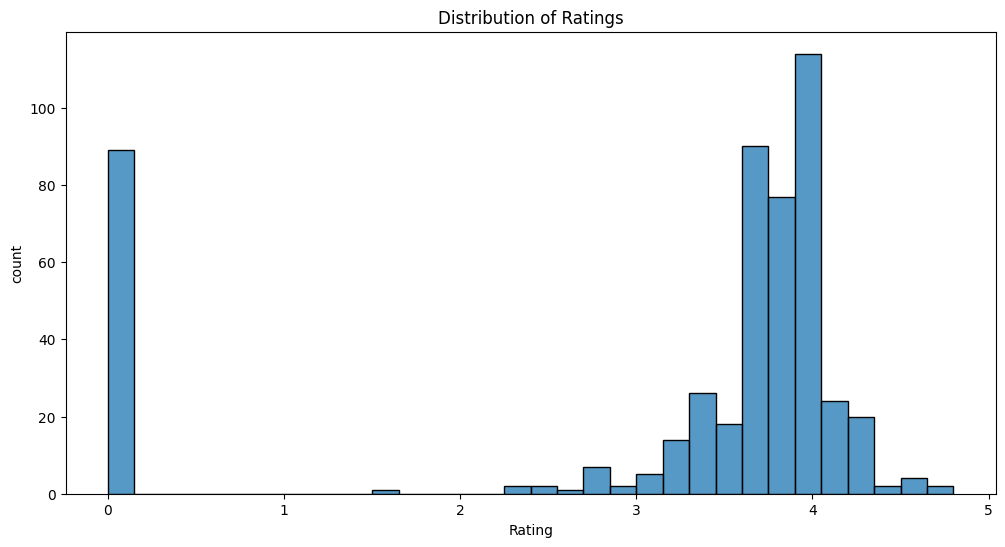

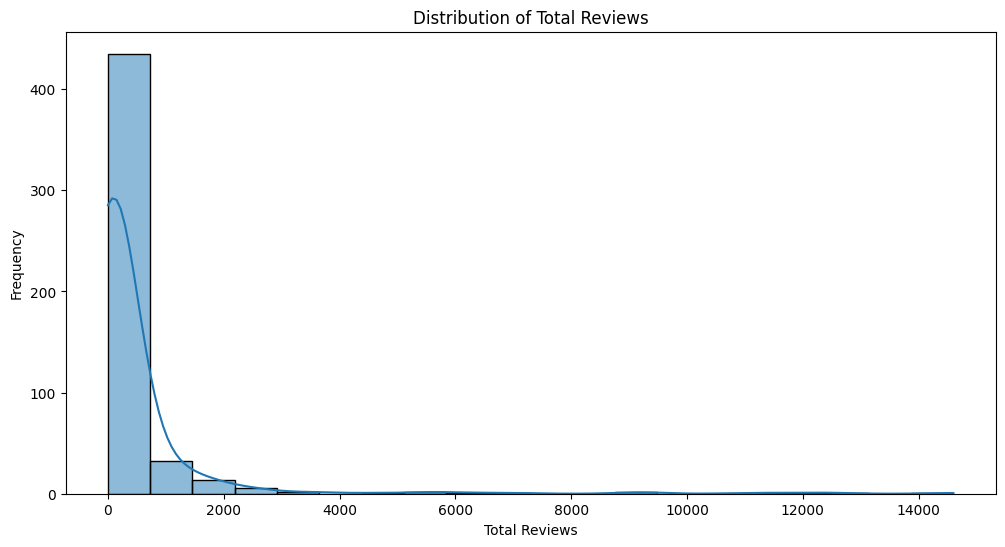

In [14]:
# What is the distribution of ratings and total reviews?

# Plot the distribution of ratings
plt.figure(figsize=(12, 6))
sns.histplot(data['rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

# Plot the distribution of total reviews
plt.figure(figsize=(12, 6))
sns.histplot(data['total_reviews'], bins=20, kde=True)
plt.title('Distribution of Total Reviews')
plt.xlabel('Total Reviews')
plt.ylabel('Frequency')
plt.show()

In [16]:
# What is the average, minimum, and maximum values for each numeric column?
data.describe()


,discounted_price,original_price,discount_percentage,discount_off,rating,total_reviews
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,775.938000,1827.592000,54.164000,205.472000,3.079600,446.338000
std,123.873967,771.875903,22.007858,529.472333,1.470643,1437.268899
min,493.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,689.000000,1599.000000,50.000000,0.000000,3.300000,12.000000
50%,778.500000,1999.000000,63.000000,0.000000,3.700000,58.000000
75%,849.000000,2311.500000,68.000000,0.000000,3.900000,260.500000
max,1264.000000,3299.000000,79.000000,2460.000000,4.800000,14600.000000


## Brand Analysis

In [19]:
# Which brands have the highest and lowest discounted prices?

# Find brands with the highest discounted prices
highest_discounted_prices = data.groupby('brand_Name')['discounted_price'].max()
highest_discounted_brands = highest_discounted_prices.idxmax()
highest_discounted_price = highest_discounted_prices.max()

# Find brands with the lowest discounted prices
lowest_discounted_prices = data.groupby('brand_Name')['discounted_price'].min()
lowest_discounted_brands = lowest_discounted_prices.idxmin()
lowest_discounted_price = lowest_discounted_prices.min()

print(f"Highest Discounted Price: {highest_discounted_price} (Brand: {highest_discounted_brands})")
print(f"Lowest Discounted Price: {lowest_discounted_price} (Brand: {lowest_discounted_brands})")


Highest Discounted Price: 1264 (Brand: Roadster)
Lowest Discounted Price: 493 (Brand: High Star)


In [27]:
#How many unique brands are present in the dataset?

Unique_brands = data['brand_Name'].nunique()
print("Total unique brands :", Unique_brands)

Total unique brands : 36


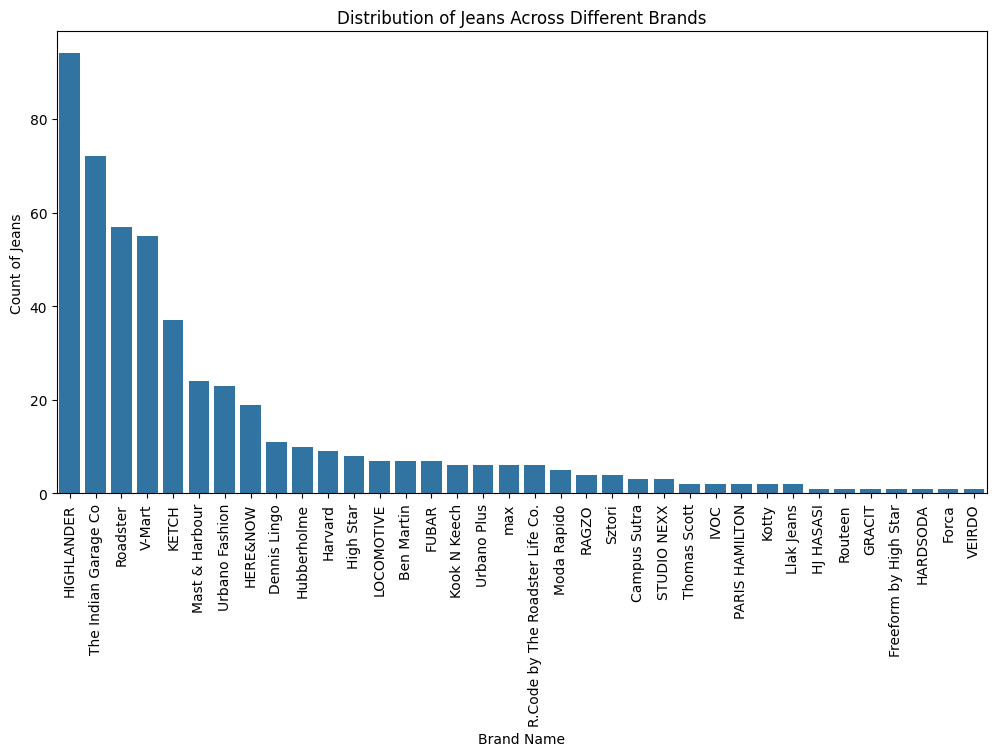

In [28]:
# What is the distribution of jeans across different brands?

# Plotting the distribution of jeans across different brands
plt.figure(figsize=(12, 6))
sns.countplot(x='brand_Name', data=data, order=data['brand_Name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Jeans Across Different Brands')
plt.xlabel('Brand Name')
plt.ylabel('Count of Jeans')
plt.show()

## Discount Analysis

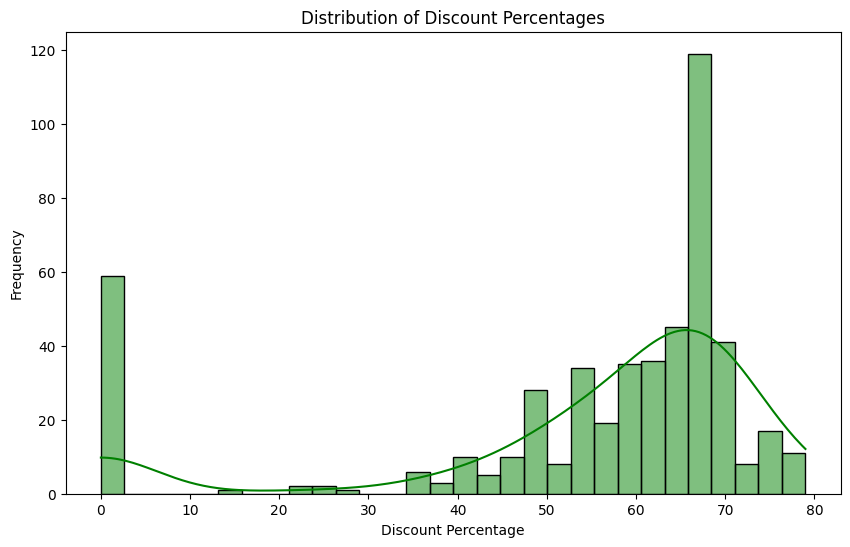

In [30]:
# How is the discount percentage distributed?

# Plotting the distribution of discount percentages
plt.figure(figsize=(10, 6))
sns.histplot(data['discount_percentage'], bins=30, kde=True, color='green')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22364\4058962720.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand_Name', y='discount_percentage', data=data, palette='viridis')


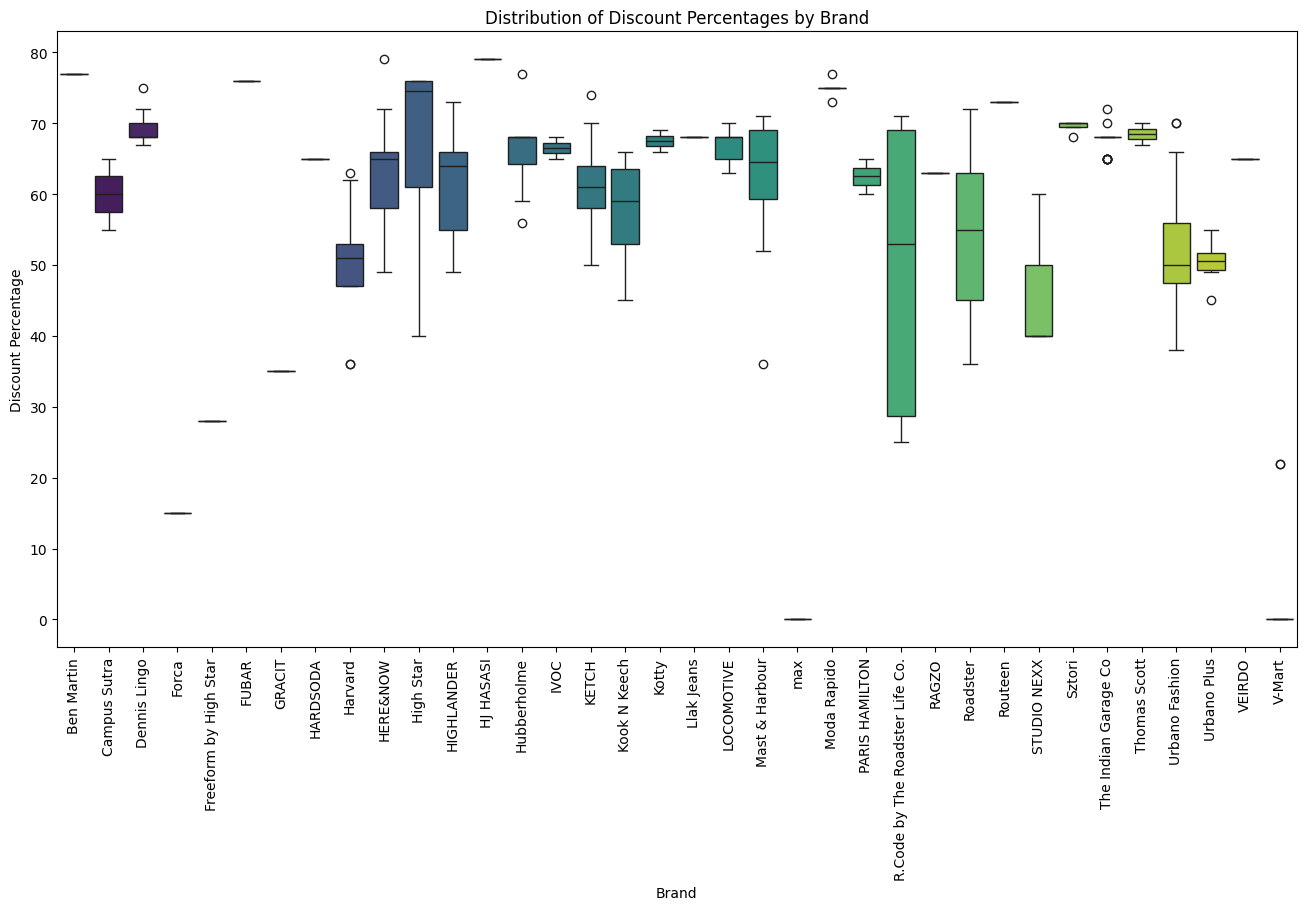

In [31]:
# Are there any patterns in the discount offered by different brands?

# Create a boxplot to visualize the distribution of discount percentages for each brand
plt.figure(figsize=(16, 8))
sns.boxplot(x='brand_Name', y='discount_percentage', data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Discount Percentages by Brand')
plt.xlabel('Brand')
plt.ylabel('Discount Percentage')
plt.show()


## Rating and Reviews


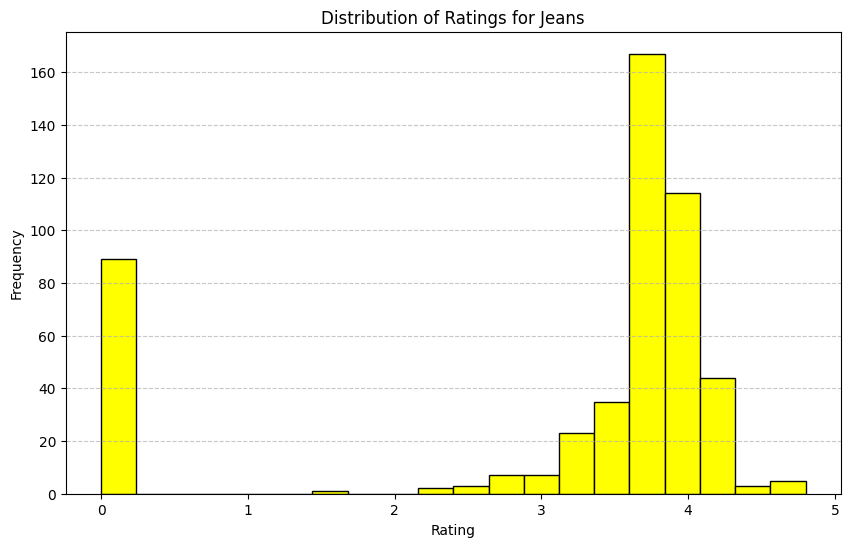

In [33]:
# What is the distribution of ratings among the jeans?

# Create a histogram to visualize the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(data['rating'].dropna(), bins=20, color='yellow', edgecolor='black')
plt.title('Distribution of Ratings for Jeans')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


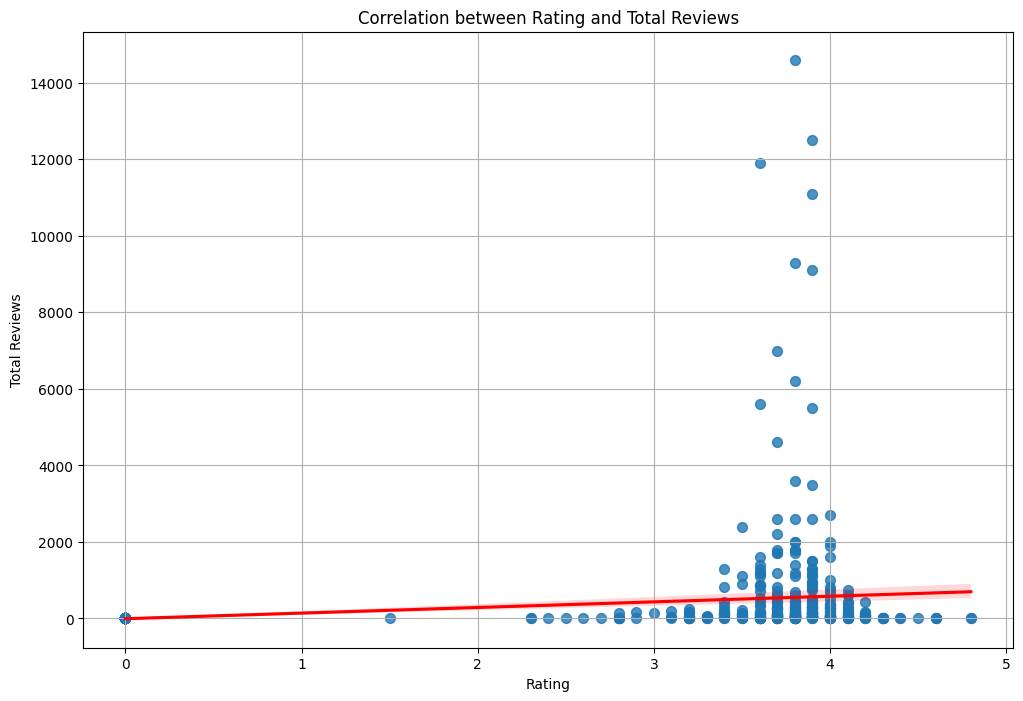

In [34]:
# How does the rating correlate with the total number of reviews?

# Scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='rating', y='total_reviews', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Rating and Total Reviews')
plt.xlabel('Rating')
plt.ylabel('Total Reviews')
plt.grid(True)
plt.show()


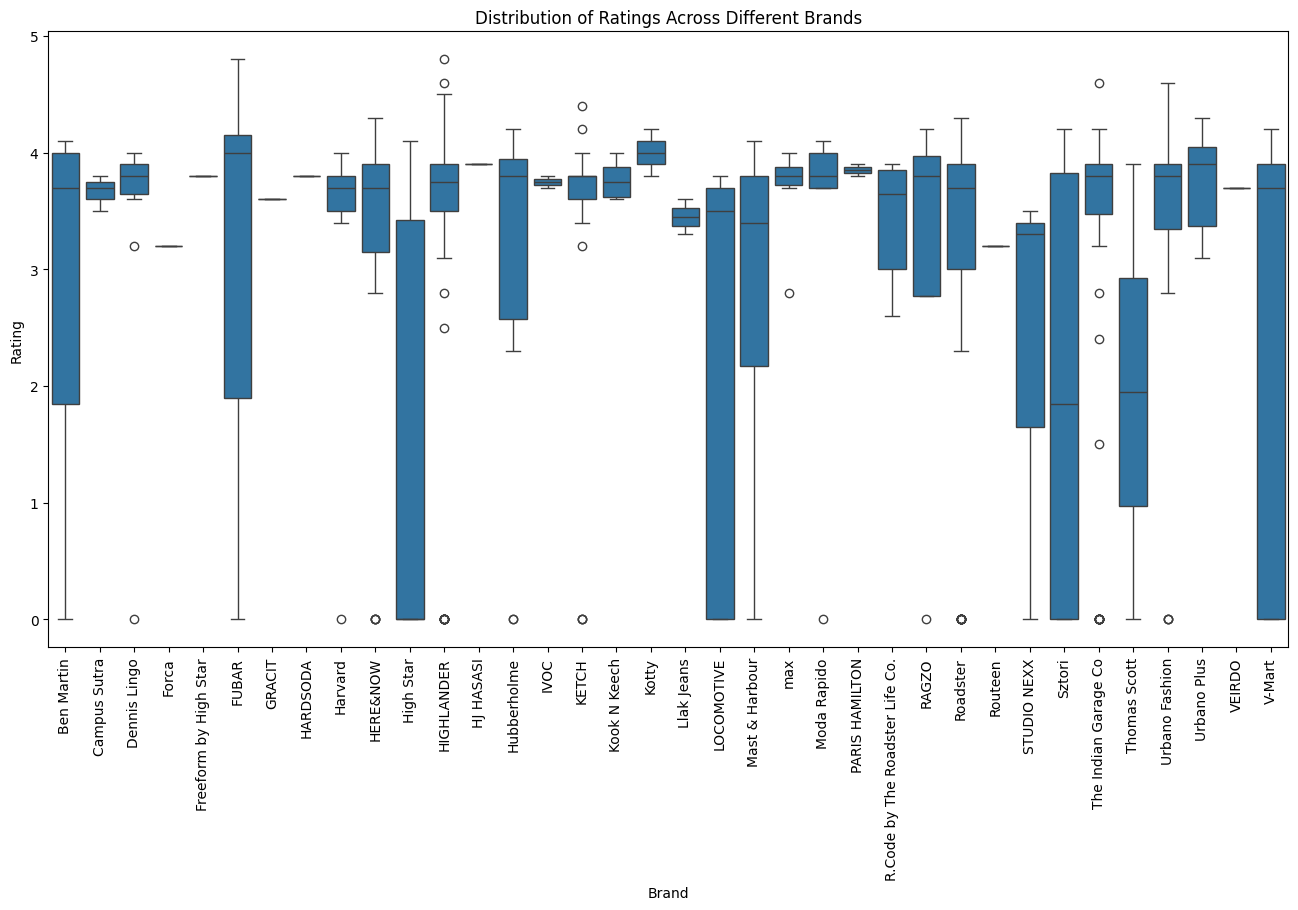

In [43]:
# Are there any patterns in ratings based on different brands or types of jeans?
# Boxplot of ratings based on brands
plt.figure(figsize=(16, 8))
sns.boxplot(x='brand_Name', y='rating', data=data)
plt.title('Distribution of Ratings Across Different Brands')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

## Price Analysis

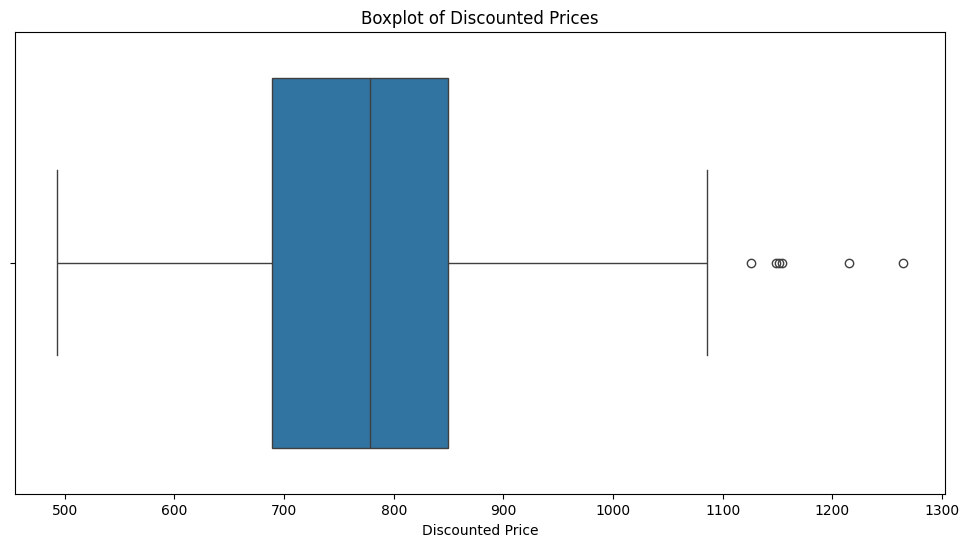

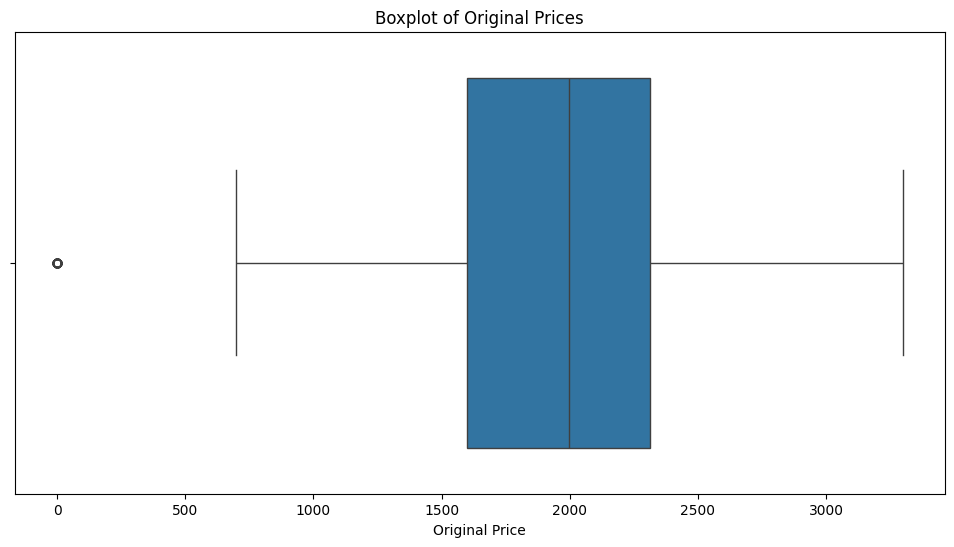

In [36]:
# Are there any outliers in the dataset in terms of prices?
# Boxplot of discounted prices
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['discounted_price'])
plt.title('Boxplot of Discounted Prices')
plt.xlabel('Discounted Price')
plt.show()

# Boxplot of original prices
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['original_price'])
plt.title('Boxplot of Original Prices')
plt.xlabel('Original Price')
plt.show()


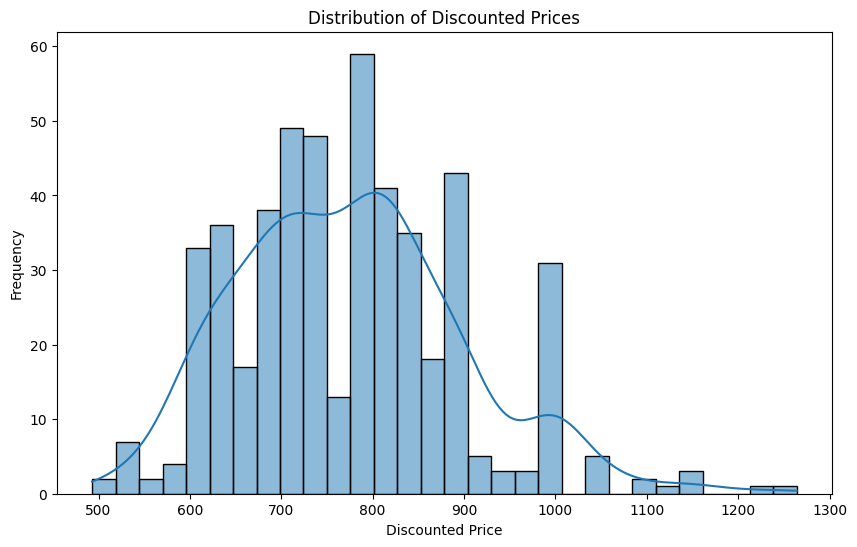

In [44]:
#How do the discounted and original prices vary across different brands or types?

# Histogram of discounted prices
plt.figure(figsize=(10, 6))
sns.histplot(data['discounted_price'], bins=30, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

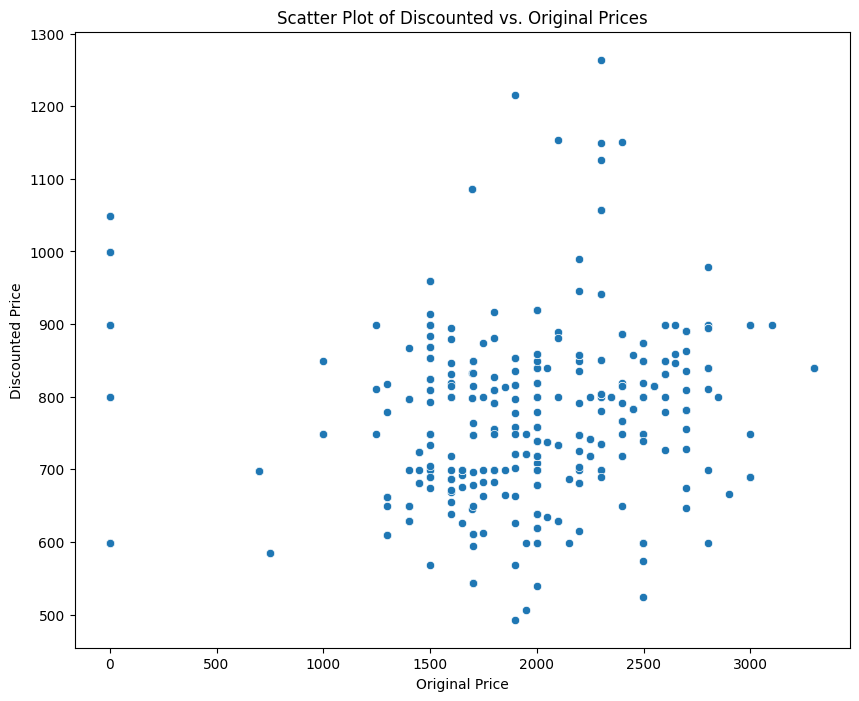

In [39]:
# Scatter plot of discounted vs. original prices
plt.figure(figsize=(10, 8))
sns.scatterplot(x='original_price', y='discounted_price', data=data)
plt.title('Scatter Plot of Discounted vs. Original Prices')
plt.xlabel('Original Price')
plt.ylabel('Discounted Price')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22364\3790947893.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand_Name', y='discounted_price', data=data, ci=None)


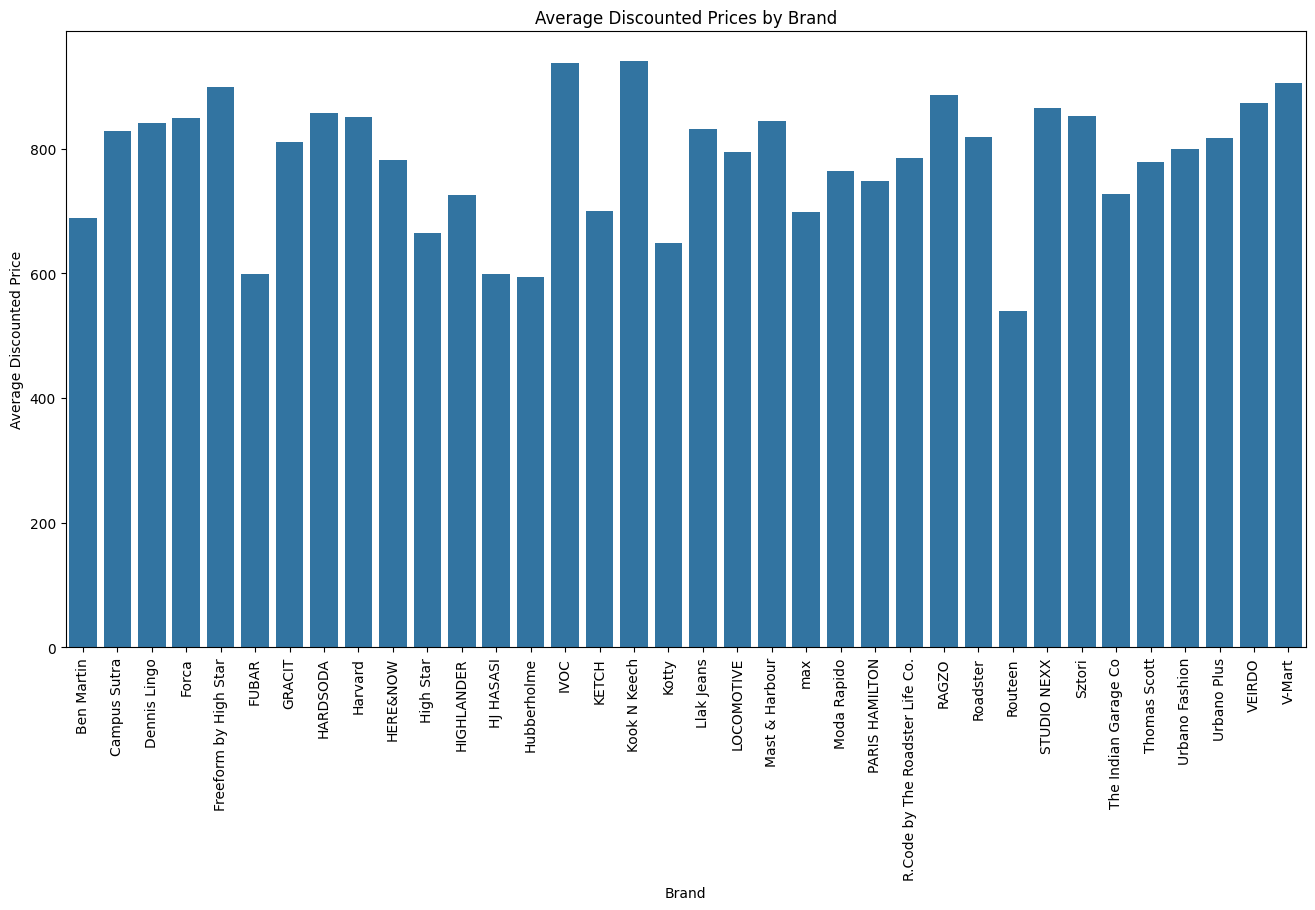

In [41]:
# Bar plot of average discounted prices by brand
plt.figure(figsize=(16, 8))
sns.barplot(x='brand_Name', y='discounted_price', data=data, ci=None)
plt.title('Average Discounted Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Discounted Price')
plt.xticks(rotation=90)
plt.show()

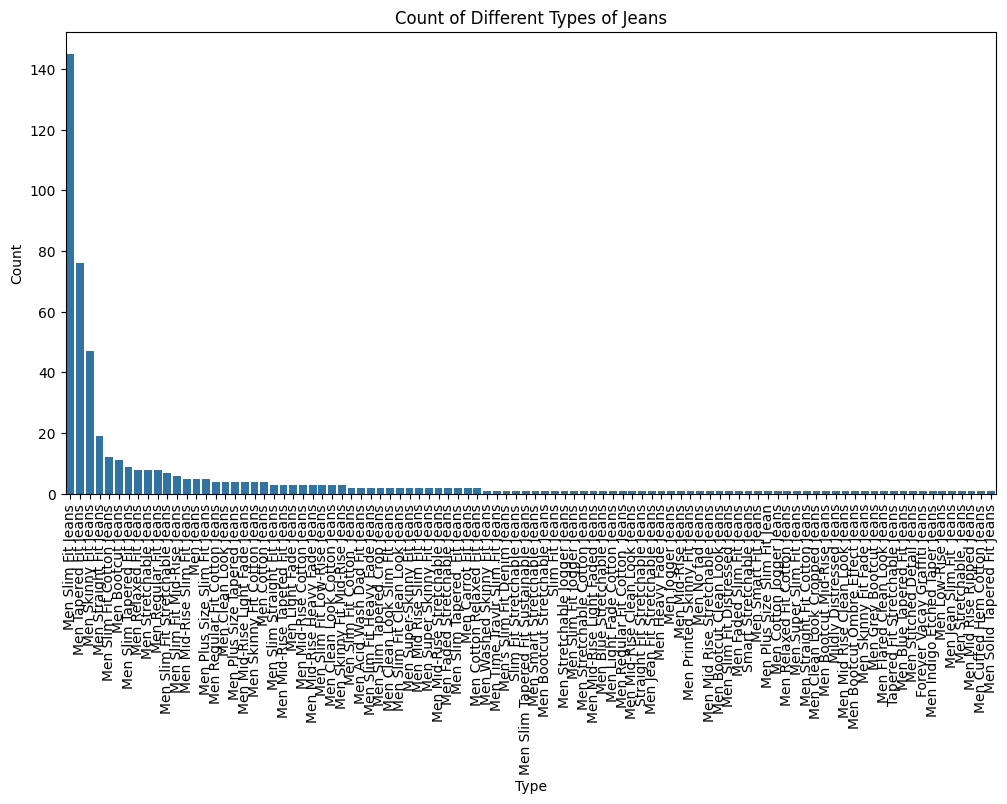

In [42]:
# Count plot of types of jeans
plt.figure(figsize=(12, 6))
sns.countplot(x='model_name', data=data, order=data['model_name'].value_counts().index)
plt.title('Count of Different Types of Jeans')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()